## S4- CASO PRACTICO-BDD FINAL

### 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as sms

In [3]:
df=pd.read_csv("wallmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Como podemos observar la base de datos contiene 6435 observaciones de propiedades y un total de 8 columnas que representan los atributos o características de cada fila.

Dado que el análisis se realizará en español, se procede a recodificar los nombres de las columnas:

In [4]:
df.rename({'Store':'tienda','Date':'fecha','Weekly_Sales':'ventas',
             'Holiday_Flag':'festivos','Temperature':'temperatura','Fuel_Price':'costoCombustible','CPI':'IPC','Unemployment':'desempleo'}, axis=1, inplace=True)
df

,tienda,fecha,ventas,festivos,temperatura,costoCombustible,IPC,desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [5]:
# Estadistica descriptiva de variables cuantitativas
df.describe()

,tienda,ventas,festivos,temperatura,costoCombustible,IPC,desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Para las variables cuantitativas, se puede observar que la variable "ventas" cuenta con una desviacion estandar alta. Por otro lado, algo que tambien salta a la vista es la cercania del Q2 y del Q3 para la variable "costoCombustible", notanto que cerca del 50% de los datos es menor que 3.44, pero a su ve el 75% de ellos es menor a 3.73, la brecha es relativamente nula.

Para este análisis no se tiene variables categóricas

### 3.  Evalúe si la base contiene datos perdidos

In [6]:
df.isna().sum()

tienda              0
fecha               0
ventas              0
festivos            0
temperatura         0
costoCombustible    0
IPC                 0
desempleo           0
dtype: int64

No se cuenta con datos perdidos o faltantes, por lo cual no hay la necesidad de eliminar ninguna observacion.

Recordemos que en datos de panel, requerimos especificar los índice para nuestra base de datos. En este caso, setiaremos la fecha y la tienda como referencia.

In [7]:
df=df.set_index(['fecha', 'tienda'])
df

,,ventas,festivos,temperatura,costoCombustible,IPC,desempleo
fecha,tienda,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667


In [8]:
fecha = df.index.get_level_values('fecha').to_list()
df['fecha'] = pd.Categorical(fecha)

Una vez que tenemos nuestra base de datos, nuestro punto de partida en este tipo de análisis siempre será un modelo simple OLS sobre nuestros datos de panel, en el cual, ignoraremos el tiempo y las características individuales, y se enfocará únicamente en las dependencias entre los individuos. 

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers)
- De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 


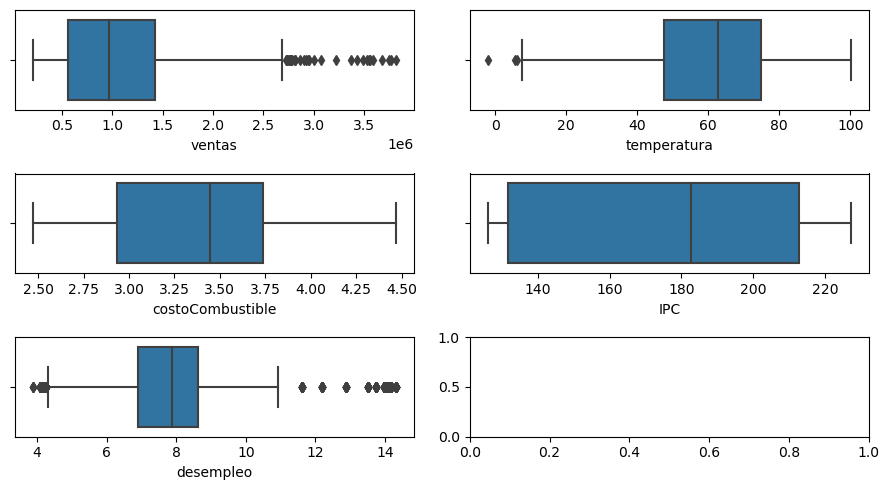

In [9]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (9,5))
plt1 = sns.boxplot(df['ventas'], ax = axs[0,0])
plt1 = sns.boxplot(df['temperatura'], ax = axs[0,1])
plt1 = sns.boxplot(df['costoCombustible'], ax = axs[1,0])
plt1 = sns.boxplot(df['IPC'], ax = axs[1,1])
plt1 = sns.boxplot(df['desempleo'], ax = axs[2,0])
plt.tight_layout()

Eliminar las observaciones de feriado para verificar como se tiene los datos atípicos (outliers)

In [10]:
df1=df[df["festivos"]==1].index
df1=df.drop(df1)
df1

,,ventas,festivos,temperatura,costoCombustible,IPC,desempleo,fecha
fecha,tienda,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,05-02-2010
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,19-02-2010
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,26-02-2010
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,05-03-2010
12-03-2010,1,1439541.59,0,57.79,2.667,211.380643,8.106,12-03-2010
...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,28-09-2012
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,05-10-2012
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,12-10-2012


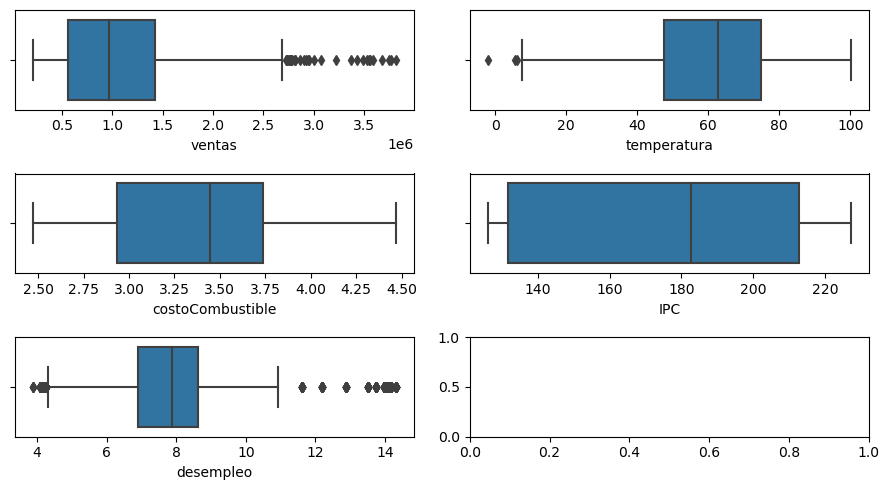

In [11]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (9,5))
plt1 = sns.boxplot(df['ventas'], ax = axs[0,0])
plt1 = sns.boxplot(df['temperatura'], ax = axs[0,1])
plt1 = sns.boxplot(df['costoCombustible'], ax = axs[1,0])
plt1 = sns.boxplot(df['IPC'], ax = axs[1,1])
plt1 = sns.boxplot(df['desempleo'], ax = axs[2,0])
plt.tight_layout()

Como no existe una notable variación al eliminar las fechas festivas mejor es dejarles para no perder datos y procedemos a remover aquellas observaciones que se encuentran fuera de rango de las variables Ventas, temperatura y desempleo

In [12]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_A = df.ventas.quantile(0.25)
Q3_A = df.ventas.quantile(0.75)
IQR_A = Q3_A - Q1_A  #rango intercuartil
print(IQR_A)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['ventas'] < (Q1_A - 1.5 * IQR_A)) |(df['ventas'] > (Q3_A + 1.5 * IQR_A)))]
df.shape

866808.5549999999


(6401, 7)

In [13]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_D = df.temperatura.quantile(0.25)
Q3_D = df.temperatura.quantile(0.75)
IQR_D = Q3_D - Q1_D  #rango intercuartil
print(IQR_D)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['temperatura'] < (Q1_D - 1.5 * IQR_D)) |(df['temperatura'] > (Q3_D + 1.5 * IQR_D)))]
df.shape

27.340000000000003


(6398, 7)

In [14]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_c = df.desempleo.quantile(0.25)
Q3_c = df.desempleo.quantile(0.75)
IQR_c = Q3_c - Q1_c  #rango intercuartil
print(IQR_c)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['desempleo'] < (Q1_c - 1.5 * IQR_c)) |(df['desempleo'] > (Q3_c + 1.5 * IQR_c)))]
df.shape

1.7309999999999999


(5917, 7)

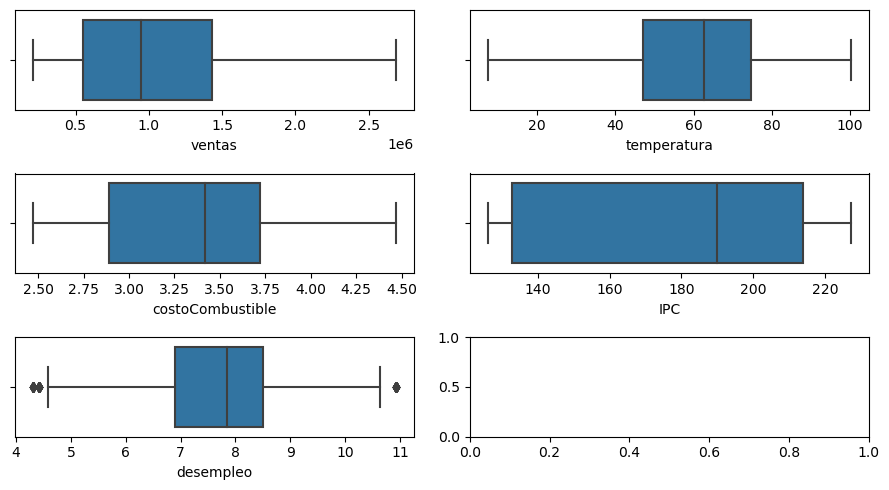

In [15]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (9,5))
plt1 = sns.boxplot(df['ventas'], ax = axs[0,0])
plt1 = sns.boxplot(df['temperatura'], ax = axs[0,1])
plt1 = sns.boxplot(df['costoCombustible'], ax = axs[1,0])
plt1 = sns.boxplot(df['IPC'], ax = axs[1,1])
plt1 = sns.boxplot(df['desempleo'], ax = axs[2,0])
plt.tight_layout()

### 5. Grafique las distribuciones de las vsriables y a priori comente sobre ellas

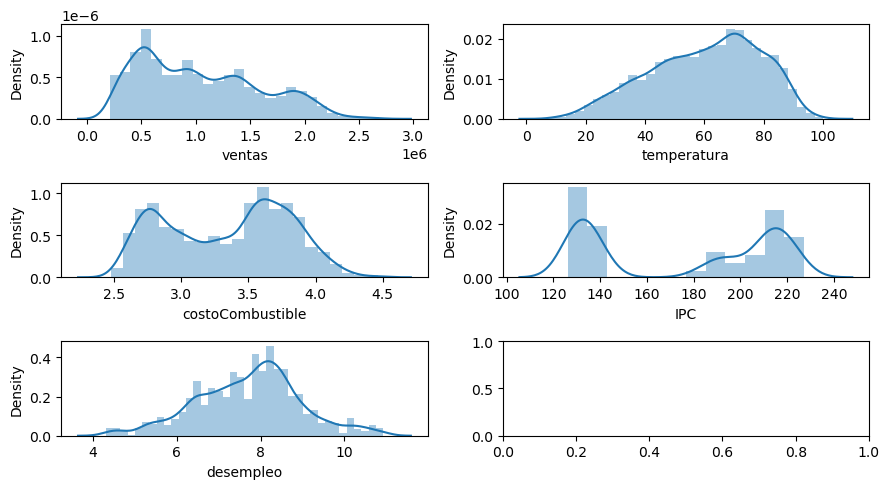

In [16]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (9,5))
plt1 = sns.distplot(df['ventas'], ax = axs[0,0])
plt2 = sns.distplot(df['temperatura'], ax = axs[0,1])
plt1 = sns.distplot(df['costoCombustible'], ax = axs[1,0])
plt2 = sns.distplot(df['IPC'], ax = axs[1,1])
plt1 = sns.distplot(df['desempleo'], ax = axs[2,0])
plt.tight_layout()

In [17]:
df.ventas.skew()

0.5031092228744799

Las observaciones de la variable ventas, a agruparse alrededor de la media. Por otro lado, se puede mencionar que su asimetría es positiva, por lo cual la distribución tiene más valores diferentes a la derecha de la media que a su izquierda

In [18]:
df.temperatura.skew()

-0.35154869769214975

In [19]:
df.costoCombustible.skew()

-0.0871283312387149

In [20]:
df.IPC.skew()

-0.09204138603781147

In [21]:
df.desempleo.skew()

-0.0993326871740596

Para las variables de costoCombustible e IPC, se puede mencionar que cuentan con varios picos en ciertos valores, lo cual tiene sentido por la naturaleza de la variable, es decir no son continuas del todo, como para tener una distribucion como la variable ventas.
Adicional para las variables temperatura y desempleo tiene una asimetría negativa, por lo cual la distribución tiene más valores diferentes a la izquierda de la media que a su derecha

### 6. Obtenga las correlaciones entre los datos de corte numérico

In [22]:
df.corr().style.background_gradient(cmap='coolwarm')

,ventas,festivos,temperatura,costoCombustible,IPC,desempleo
ventas,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
festivos,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
temperatura,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
costoCombustible,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
IPC,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
desempleo,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


### 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

En el caso de correlación positiva, el mayor valor se encuentra entre las variables: IPC y costoCombustible. Y su interpretación sería de la siguiente forma:

        "A medida que el costo de combustible aumenta, también lo hace el índice de precios al consumidor vigente"


### 8. Indique que tipo de modelación realizarán y porqué

Utilizaremos el modelo de ML Pooled OLS como base, ya que si se violan las condiciones especificadas previamente, los modelos de efectos fjos o efectos aleatorios serán más adecuados. 


In [23]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [24]:
X = sm.tools.tools.add_constant(df.ventas)
y = df.IPC

In [25]:
modelo1 = PooledOLS(y, X)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [26]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [27]:
resultados_pooled_OLS

Dep. Variable:,IPC,R-squared:,0.0069
Estimator:,PooledOLS,R-squared (Between):,-0.0318
No. Observations:,5917,R-squared (Within):,0.0072
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0069
Time:,21:34:41,Log-likelihood,-3.006e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,41.008
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(1,5915)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,522.50


#### Verificación de los supuestos de la Regresión Pooled OLS

#### Homocedasticidad

Para validar este supuesto, primero graficaremos los residuos y validaremos la prueba gráfica con el test estadístico de Breusch-Pagan.

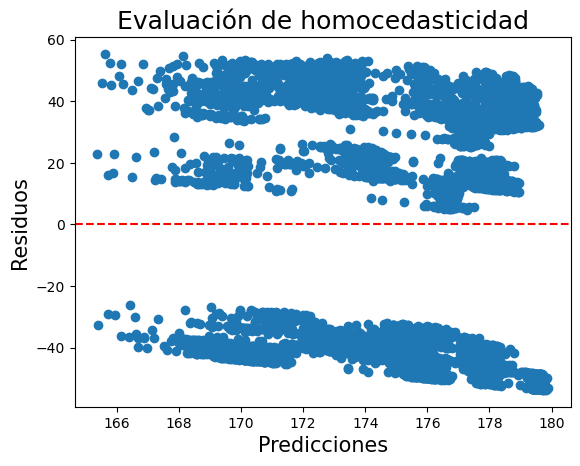

In [28]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

In [29]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [30]:
pooled_OLS_df = pd.concat([df, residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['fecha'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(df['ventas']).fillna(0)

In [31]:
pooled_OLS_df

,,ventas,festivos,temperatura,costoCombustible,IPC,desempleo,residual
fecha,tienda,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,39.618821
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,39.754463
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,39.625503
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,38.469549
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,39.351162
...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,15.077100
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,15.352934
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,15.515708


In [32]:
breusch_pagan = het_breuschpagan(pooled_OLS_df.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 2.4181741907424517, 'LM p-val': 0.11993464498520046, 'F-Stat': 2.4183451610774713, 'F p-val': 0.11997505402806653}


#### No- autocorrelación

In [33]:
from statsmodels.stats.stattools import durbin_watson

In [34]:
durbin_watson = durbin_watson(pooled_OLS_df.residual) 
print(durbin_watson)

0.01670885423198969


En nuestro ejercicio, el resultado es 0.0167, lo que indica claramente una fuerte autocorrelación positiva, violándose el supuesto

Como las dos secciones del tercer supuesto fueron contradichas, a seguir exploraremos los modelos de efectos fijos y efectos aleatorios:

### 9. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo

#### Modelo de Efectos Fijos "fixed effects"

In [35]:
from linearmodels import PanelOLS

In [36]:
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()

In [37]:
resultados_fe

Dep. Variable:,IPC,R-squared:,0.0072
Estimator:,PanelOLS,R-squared (Between):,-0.0332
No. Observations:,5917,R-squared (Within):,0.0072
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0069
Time:,21:43:12,Log-likelihood,-3.003e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,41.858
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(1,5773)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,41.858


#### Modelo de Efectos Aleatorios "random effects"

In [38]:
from linearmodels import RandomEffects

In [39]:
modelo_re = RandomEffects(y, X)
resultados_re = modelo_re.fit()

In [40]:
resultados_re

Dep. Variable:,IPC,R-squared:,0.0069
Estimator:,RandomEffects,R-squared (Between):,-0.0318
No. Observations:,5917,R-squared (Within):,0.0072
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0069
Time:,21:43:50,Log-likelihood,-3.006e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,41.008
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(1,5915)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,41.008


Como ambos modelos devuelven resultados similares, para seleccionar el modelo, aplicaremos el test de Hausman.

In [41]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [42]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [43]:
hausman = hausman(resultados_fe, resultados_re) 

In [44]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 0.9227580629949672
degrees of freedom: 2
p-Value:0.6304136854649444
